In [ ]:
# Install the required package
!pip install alpaca-trade-api


In [2]:
# Import necessary libraries
import alpaca_trade_api as tradeapi
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from config import API_KEY, SECRET_KEY
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

# Set up Alpaca API with imported keys
BASE_URL = 'https://paper-api.alpaca.markets/v2'
try:
    api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')
    logging.info("Connected to Alpaca API successfully.")
except Exception as e:
    logging.error(f"Error connecting to Alpaca API: {e}")
    raise


# Original data with mismatched lengths
data = {
    'Date': [
        '2024-07-22', '2024-07-22', '2024-07-22', '2024-07-22', '2024-07-22',
        '2024-07-23', '2024-07-23', '2024-07-23', '2024-07-23', '2024-07-23',
        '2024-07-24', '2024-07-24', '2024-07-24', '2024-07-24', '2024-07-24',
        '2024-07-25', '2024-07-25', '2024-07-25', '2024-07-25', '2024-07-25',
        '2024-07-26', '2024-07-26', '2024-07-26', '2024-07-26', '2024-07-26',
        '2024-07-29', '2024-07-29', '2024-07-29', '2024-07-29', '2024-07-29',
        '2024-07-30', '2024-07-30', '2024-07-30', '2024-07-30', '2024-07-30',
        '2024-07-31', '2024-07-31', '2024-07-31', '2024-07-31', '2024-07-31',
        '2024-08-01', '2024-08-01', '2024-08-01', '2024-08-01', '2024-08-01',
        '2024-08-02', '2024-08-02', '2024-08-02', '2024-08-02', '2024-08-02',
        '2024-08-05', '2024-08-05', '2024-08-05', '2024-08-05',
        '2024-08-06', '2024-08-06', '2024-08-06', '2024-08-06',
        '2024-08-07', '2024-08-07', '2024-08-07', '2024-08-07',
        '2024-08-08', '2024-08-08', '2024-08-08', '2024-08-08',
        '2024-08-09', '2024-08-09', '2024-08-09', '2024-08-09'
    ],
    'Ticker': [
        'NVDA', 'AMD', 'MSFT', 'TSLA', 'AMZN',
        'GOOGL', 'AAPL', 'AMZN', 'NFLX', 'GOOGL',
        'FB', 'QCOM', 'ADBE', 'ORCL', 'FB',
        'CRM', 'AVGO', 'TSLA', 'INTC', 'TSLA',
        'CSCO', 'TXN', 'IBM', 'EBAY', 'CSCO',
        'TSLA', 'NFLX', 'PYPL', 'CSCO',
        'GOOGL', 'FB', 'ADBE', 'ORCL',
        'NVDA', 'AMD', 'EBAY', 'CRM',
        'AMZN', 'AAPL', 'MSFT', 'IBM',
        'DIS', 'HD', 'NKE', 'PFE',
        'QCOM', 'AVGO', 'INTC', 'TXN',
        'AAPL', 'AMZN', 'MSFT', 'QCOM',
        'NVDA', 'ANET', 'QCOM', 'MSFT',
        'AMZN', 'AAPL', 'MSFT', 'QCOM'
    ],
    'Type': [
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer'
    ],
    'Pct Change': [
        5.70, 5.40, 5.20, 5.00, 4.75,
        6.10, 5.85, 5.60, 5.35, 4.00,
        6.20, 5.95, 5.70, 5.45, 6.40,
        5.80, 5.55, 5.50, 5.25, 6.00,
        4.75, 4.50, 4.20, 3.95,
        5.10, 4.85, 4.60, 4.35,
        6.20, 5.95, 5.70, 5.45,
        5.80, 5.55, 5.30, 5.05,
        -4.55, -4.30, -4.00, -3.75,
        -4.75, -4.50, -4.25, -4.00,
        -4.30, -4.00, -3.75, -3.50,
        -6.62, -5.00, -5.03, -4.30,
        -6.62, -7.29, -6.62, -5.00,
        -4.30, -5.03, -5.00, -6.62,
        -4.30, -6.11, -2.83, -4.00
    ]
}

# Function to fix lengths of lists
def fix_length(data):
    min_length = min(len(data['Date']), len(data['Ticker']), len(data['Type']), len(data['Pct Change']))
    for key in data:
        data[key] = data[key][:min_length]
    return data

# Adjust lengths
fixed_data = fix_length(data)

# Check lengths after adjustment
logging.info(f"Adjusted lengths of lists: {len(fixed_data['Date'])} records.")

# Create DataFrame with adjusted data
top_gainers_losers = pd.DataFrame(fixed_data)
top_gainers_losers['Date'] = pd.to_datetime(top_gainers_losers['Date'])

# Add 'Gain or Loss' column based on 'Pct Change'
top_gainers_losers['Gain or Loss'] = top_gainers_losers['Pct Change'].apply(lambda x: 'Gainer' if x > 0 else 'Loser')




INFO:root:Connected to Alpaca API successfully.
INFO:root:Adjusted lengths of lists: 61 records.


Missing entry or exit price for trade: FB on 2024-07-24 00:00:00
Missing entry or exit price for trade: FB on 2024-07-24 00:00:00
Missing entry or exit price for trade: FB on 2024-07-30 00:00:00
Win Percentage: 54.10%
Average Percentage Change: 1.16%
Best Trade: Date            2024-07-24 00:00:00
Ticker                           FB
Entry Price                     NaN
Exit Price                      NaN
Pct Change                      6.4
Outcome                    No Entry
Gain or Loss                 Gainer
Name: 14, dtype: object
Worst Trade: Date            2024-08-05 00:00:00
Ticker                         NVDA
Entry Price                   97.31
Exit Price                 100.8301
Pct Change                    -7.29
Outcome                        Loss
Gain or Loss                  Loser
Name: 53, dtype: object
Average Winning Trade Percentage: 5.27%
Average Losing Trade Percentage: -4.86%
Return Percentage for Gainers: 18.92%
Return Percentage for Losers: -11.46%


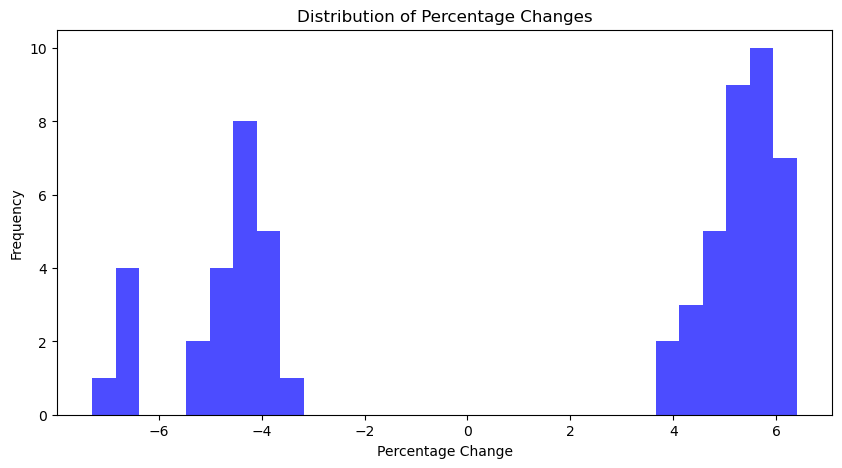

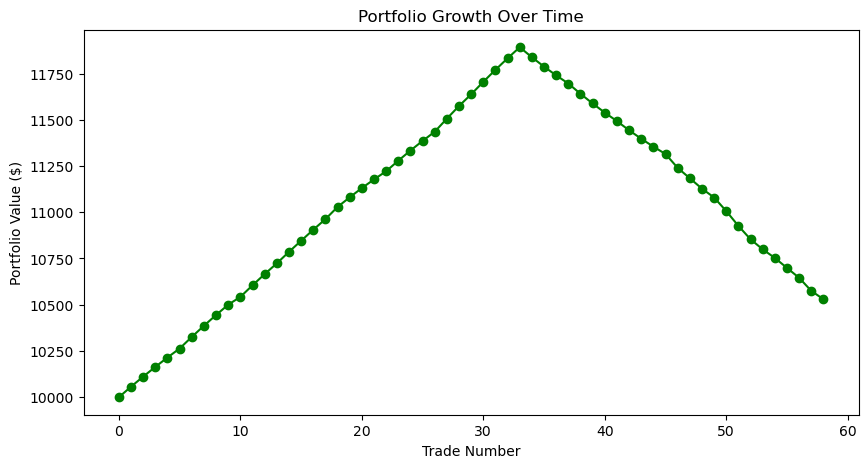

Start Cash: 10000
End Cash: 10529.533751572759
Portfolio Return: 5.30%


In [3]:
def fetch_historical_data(api, ticker, date):
    start_date = pd.to_datetime(date).strftime('%Y-%m-%dT09:30:00Z')
    end_date = pd.to_datetime(date).strftime('%Y-%m-%dT16:00:00Z')
    
    bars = api.get_bars(
        ticker,
        tradeapi.rest.TimeFrame.Minute,
        start=start_date,
        end=end_date
    ).df
    
    return bars

# Initialize trade records
trade_records = []

def record_trade(entry_price, exit_price, ticker, date, pct_change, outcome):
    if entry_price is not None and exit_price is not None:
        trade_data = {
            'Date': date,
            'Ticker': ticker,
            'Entry Price': entry_price,
            'Exit Price': exit_price,
            'Pct Change': pct_change,
            'Outcome': outcome,
            'Gain or Loss': 'Gainer' if pct_change > 0 else 'Loser'
        }
        trade_records.append(trade_data)
    else:
        print(f"Missing entry or exit price for trade: {ticker} on {date}")

def simulate_trades(top_gainers_losers, api):
    results = []
    for index, row in top_gainers_losers.iterrows():
        ticker = row['Ticker']
        date = row['Date']
        pct_change = row['Pct Change']
        gain_or_loss = row['Gain or Loss']
        
        data = fetch_historical_data(api, ticker, date)
        if not data.empty:
            entry_price = data.iloc[0]['open']
            exit_price = data.iloc[-1]['close']
            outcome = 'Win' if pct_change > 0 else 'Loss'
        else:
            entry_price = exit_price = None
            outcome = 'No Entry'
        
        # Record the trade
        record_trade(entry_price, exit_price, ticker, date, pct_change, outcome)
        
        # Append results for further analysis
        results.append({
            'Date': date,
            'Ticker': ticker,
            'Entry Price': entry_price,
            'Exit Price': exit_price,
            'Pct Change': pct_change,
            'Outcome': outcome,
            'Gain or Loss': gain_or_loss
        })

    return pd.DataFrame(results)

def simulate_portfolio(start_cash, strategy_results):
    cash = start_cash
    portfolio_values = [cash]  # Start with initial cash value
    for result in strategy_results.itertuples():
        if result.Outcome == 'No Entry':
            continue
        trade_amount = cash * 0.1
        cash -= trade_amount
        pct_change = result._5  # Accessing 'Pct Change' using positional index
        profit = trade_amount * pct_change / 100
        cash += trade_amount + profit
        portfolio_values.append(cash)
    return cash, portfolio_values

def analyze_and_visualize(strategy_results, portfolio_values):
    # Calculate key statistics
    win_percentage = (strategy_results['Outcome'] == 'Win').mean() * 100
    average_pct_change = strategy_results['Pct Change'].mean()
    best_trade = strategy_results.loc[strategy_results['Pct Change'].idxmax()]
    worst_trade = strategy_results.loc[strategy_results['Pct Change'].idxmin()]
    
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Average Percentage Change: {average_pct_change:.2f}%")
    print("Best Trade:", best_trade)
    print("Worst Trade:", worst_trade)
    
    # Average winning and losing trades
    average_winning_pct = strategy_results.loc[strategy_results['Outcome'] == 'Win', 'Pct Change'].mean()
    average_losing_pct = strategy_results.loc[strategy_results['Outcome'] == 'Loss', 'Pct Change'].mean()
    print(f"Average Winning Trade Percentage: {average_winning_pct:.2f}%")
    print(f"Average Losing Trade Percentage: {average_losing_pct:.2f}%")
    
    # Separate portfolio returns for top gainers vs top losers
    gainers_results = strategy_results[strategy_results['Gain or Loss'] == 'Gainer']
    losers_results = strategy_results[strategy_results['Gain or Loss'] == 'Loser']
    
    end_cash_gainers, _ = simulate_portfolio(start_cash, gainers_results)
    end_cash_losers, _ = simulate_portfolio(start_cash, losers_results)
    
    return_percentage_gainers = (end_cash_gainers - start_cash) / start_cash * 100
    return_percentage_losers = (end_cash_losers - start_cash) / start_cash * 100
    
    print(f"Return Percentage for Gainers: {return_percentage_gainers:.2f}%")
    print(f"Return Percentage for Losers: {return_percentage_losers:.2f}%")
    
    # Plot distribution of percentage changes
    plt.figure(figsize=(10, 5))
    plt.hist(strategy_results['Pct Change'], bins=30, alpha=0.7, color='blue')  # Adjust bins if necessary
    plt.title('Distribution of Percentage Changes')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    plt.show()

    # Plot portfolio growth over time
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(portfolio_values)), portfolio_values, marker='o', linestyle='-', color='green')
    plt.title('Portfolio Growth Over Time')
    plt.xlabel('Trade Number')
    plt.ylabel('Portfolio Value ($)')
    plt.show()


# Main code execution
strategy_results = simulate_trades(top_gainers_losers, api)

# Portfolio simulation
start_cash = 10000
end_cash, portfolio_values = simulate_portfolio(start_cash, strategy_results)

# Analyze results and visualize
analyze_and_visualize(strategy_results, portfolio_values)

portfolio_return = (end_cash - start_cash) / start_cash * 100

print(f"Start Cash: {start_cash}")
print(f"End Cash: {end_cash}")
print(f"Portfolio Return: {portfolio_return:.2f}%")
